# 실기 평가 - 프로그래밍 기초

### 1. 두개의 산 그리기

In [47]:
for i in range(1, 5):
    for k in range(4-i, 0, -1):
        print(' ', end='')
    for k in range(1, 2*i):
        print('#', end='')
    for k in range(4-i, -1, -1):
        print(' ', end='')
    for k in range(4-i, 0, -1):
        print(' ', end='')
    for k in range(1, 2*i):
        print('#', end='')
    print()

   #       #
  ###     ###
 #####   #####
####### #######


### 2. 지뢰 찾기

In [73]:
import random
def create_mine(n):
    mine = []
    for i in range(n):
        row = []
        for k in range(n):
            row.append(random.choice('.#'))
        mine.append(row)
        
    for i in range(n):
        for k in range(n):
            print(mine[i][k], end='')
        print()
        
    return mine

In [74]:
size = 5
mine = create_mine(size)
pad_mine = []
pad_mine.append(['.' for i in range(size+2)])
for i in range(size):
    pad_row = []
    pad_row.append('.')
    for k in range(size):
        pad_row.append(mine[i][k])
    pad_row.append('.')
    pad_mine.append(pad_row)
pad_mine.append(['.' for i in range(size+2)])

print()
for i in range(1, size+1):
    for k in range(1, size+1):
        if pad_mine[i][k] == '#':
            print('#', end='')
        else:
            mines = pad_mine[i-1][k-1] + pad_mine[i-1][k] + pad_mine[i-1][k+1] + \
                    pad_mine[i][k-1] + pad_mine[i][k] + pad_mine[i][k+1] + \
                    pad_mine[i+1][k-1] + pad_mine[i+1][k] + pad_mine[i+1][k+1]
            print(mines.count('#'), end='')
    print()
        

.##.#
#.#..
#..##
.###.
.##..

2##3#
#5#53
#55##
3###3
2##31


### 3. tanh 그래프 그리기

In [70]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False    # minus 표시
mpl.rc('font', family='Malgun Gothic')
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["font.size"] = 14

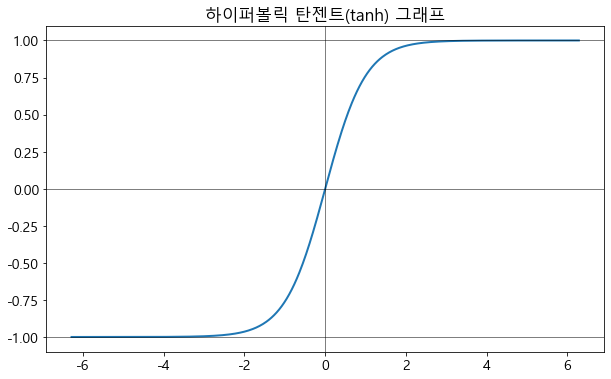

In [72]:
xdata = np.linspace(-2 * np.pi, 2* np.pi, 600)
ydata = np.tanh(xdata)
plt.plot(xdata, ydata, lw=2)
plt.ylim(-1.1, 1.1)
plt.title('하이퍼볼릭 탄젠트(tanh) 그래프')
plt.axhline(y=0, color='k', linewidth=0.5)    # 수평선(x축)
plt.axhline(y=1, color='k', linewidth=0.5)
plt.axhline(y=-1, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)    # 수직선(y축)
plt.show()

### 4. 멜론 사이트 크롤링

In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

In [42]:
url = 'https://www.melon.com/chart/month/index.htm?classCd=DM0000#params%5Bidx%5D=1&params%5BrankMonth%5D=202005&params%5BisFirstDate%5D=false&params%5BisLastDate%5D=true'

In [3]:
import requests

In [6]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
req = requests.get(url, headers = header) 
html = req.text

In [9]:
soup = BeautifulSoup(html, 'html.parser')

In [11]:
trs = soup.find_all('tr')
len(trs)

101

In [12]:
trs[0]

<tr>
<th scope="col">
<div class="wrap t_right"><input class="input_check d_checkall" title="곡 목록 전체 선택" type="checkbox"/></div>
</th>
<th scope="col">
<div class="wrap t_center"><span class="rank">순위</span></div>
</th>
<th scope="col">
<div class="wrap none">순위등락</div>
</th>
<th scope="col">
<div class="wrap none">앨범이미지</div>
</th>
<th scope="col">
<div class="wrap none">곡 상세가기</div>
</th>
<th scope="col">
<div class="wrap pd_l_12">곡정보</div>
</th>
<th scope="col">
<div class="wrap pd_l_12">앨범</div>
</th>
<th scope="col">
<div class="wrap pd_l_30">좋아요</div>
</th>
<th scope="col">
<div class="wrap t_center">듣기</div>
</th>
<th scope="col">
<div class="wrap t_center">담기</div>
</th>
<th scope="col">
<div class="wrap t_center">다운</div>
</th>
<th scope="col">
<div class="wrap t_center">뮤비</div>
</th>
</tr>

In [38]:
rank = []
song = []
singer = []
album = []
last = []
tr = trs[1]

In [15]:
tr.find(class_='rank').get_text()

'1'

In [16]:
aa = tr.find(class_='wrap_song_info').find_all('a')
aa[0].get_text()

'에잇(Prod.&Feat. SUGA of BTS)'

In [17]:
aa[1].get_text()

'아이유'

In [18]:
tr.find_all(class_='wrap_song_info')[1].find('a').get_text()

'에잇'

In [19]:
tr.find_all('td')[2].get_text()

'\n\n순위 진입\n\n'

In [39]:
for i in range(1,101):
    tr = trs[i]
    number = int(tr.find(class_='rank').get_text())
    rank.append(number)
    aa = tr.find(class_='wrap_song_info').find_all('a')
    song.append(aa[0].get_text())
    singer.append(aa[1].get_text())
    album.append(tr.find_all(class_='wrap_song_info')[1].find('a').get_text())
    text = tr.find_all('td')[2].get_text()
    text = text.replace('\n\n','')
    text = text.replace('\n', '*')
    if text == '순위 진입':
        last_rank = -1
    elif text == '순위 동일':
        last_rank = number
    else:
        tmp = text.split('*')
        if '상승' in tmp[0]:
            last_rank = number + int(tmp[1])
        else:
            last_rank = number - int(tmp[1])
    last.append(last_rank)

In [23]:
print(rank)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100']


In [24]:
print(song)

['에잇(Prod.&Feat. SUGA of BTS)', '아로하', '살짝 설렜어 (Nonstop)', '나비와 고양이 (feat.백현 (BAEKHYUN))', '시작', '처음처럼', '덤더럼(Dumhdurum)', '좋은 사람 있으면 소개시켜줘', '흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야', 'Happy', 'ON', '아무노래', 'METEOR', 'Blueming', '우리 만남이', '그때 그 아인', '돌덩이', '작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey)', '사랑하게 될 줄 알았어', '마음을 드려요', '화려하지 않은 고백', '그대 고운 내사랑', '늦은 밤 너의 집 앞 골목길에서', 'WANNABE', 'Dolphin', 'Psycho', '반만', '00:00 (Zero O’Clock)', '어떻게 지내 (Prod. By VAN.C)', 'Stay Tonight', '내 눈물 모아', '오늘도 빛나는 너에게 (To You My Light) (Feat.이라온)', '모든 날, 모든 순간 (Every day, Every Moment)', '너를 사랑하고 있어', '어떻게 이별까지 사랑하겠어, 널 사랑하는 거지', 'Black Swan', '우리 왜 헤어져야 해', '이제 나만 믿어요', 'FIESTA', '안녕', '친구', 'Love poem', 'HIP', 'Lonely Night', 'Filter', 'Moon', '시차', '다시 난, 여기', '찐이야', '너를 만나', 'Inner Child', '너를 그린 우주 (Insomnia2020) (Feat. 이라온)', '어느 60대 노부부이야기', 'We are Bulletproof : the Eternal', '시든 꽃에 물을 주듯', '조금 취했어 (Prod. 2soo)', '사랑이란 멜로는 없어', 'Ridin’', '봄날', 'LALALILALA', 'Louder than bombs', '넌 내가 보고 싶지 않나 봐', 'Square (20

In [25]:
print(singer)

['아이유', '조정석', '오마이걸', '볼빨간사춘기', '가호 (Gaho)', '엠씨더맥스 (M.C the MAX)', 'Apink (에이핑크)', '조이 (JOY)', '장범준', '태연 (TAEYEON)', '방탄소년단', '지코 (ZICO)', '창모 (CHANGMO)', '아이유', '폴킴', '김필', '하현우 (국카스텐)', '방탄소년단', '전미도', '아이유', '규현 (KYUHYUN)', '어반자카파', '노을', 'ITZY (있지)', '오마이걸', 'Red Velvet (레드벨벳)', '진민호', '방탄소년단', '오반', '청하', '휘인 (Whee In)', '마크툽 (MAKTUB)', '폴킴', '백현 (BAEKHYUN)', 'AKMU (악동뮤지션)', '방탄소년단', '신예영', '임영웅', 'IZ*ONE (아이즈원)', '폴킴', '방탄소년단', '아이유', '마마무 (Mamamoo)', '권진아', '방탄소년단', '방탄소년단', '방탄소년단', '백예린', '영탁', '폴킴', '방탄소년단', '마크툽 (MAKTUB)', '임영웅', '방탄소년단', 'HYNN (박혜원)', '임재현', '전상근', 'NCT DREAM', '방탄소년단', '에이프릴 (APRIL)', '방탄소년단', '신예영', '백예린', '수호 (SUHO)', '방탄소년단', '백현 (BAEKHYUN)', '방탄소년단', '방탄소년단', '방탄소년단', '임영웅', '(여자)아이들', 'HYNN (박혜원)', 'V.O.S', '볼빨간사춘기', '잔나비', '황인욱', '임재현', 'EXO', '먼데이 키즈 (Monday Kiz)', '마크툽 (MAKTUB)', '찬열 (CHANYEOL)', '곽진언', 'KCM', 'NCT 127', '염따', 'DAY6 (데이식스)', 'Crush', '벤', '창모 (CHANGMO)', '임영웅', '영탁', 'Raiden', '제이레빗(J Rabbit)', '김재환', 'Crush', '폴킴', 'V', '노을', '

In [26]:
print(album)

['에잇', '슬기로운 의사생활 OST Part 3', 'NONSTOP', '사춘기집Ⅱ 꽃 본 나비', '이태원 클라쓰 OST Part.2', 'CEREMONIA', 'LOOK', '슬기로운 의사생활 OST Part 2', '멜로가 체질 OST Part 3', 'Happy', 'MAP OF THE SOUL : 7', '아무노래', 'Boyhood', 'Love poem', "정규 2집 '마음, 둘'", '이태원 클라쓰 OST Part.6', '이태원 클라쓰 OST Part.3', 'MAP OF THE SOUL : PERSONA', '슬기로운 의사생활 OST Part 11', '사랑의 불시착 OST Part 11', '슬기로운 의사생활 OST Part 4', '슬기로운 의사생활 OST Part 5', '늦은 밤 너의 집 앞 골목길에서', "IT'z ME", 'NONSTOP', '‘The ReVe Festival’ Finale', '반만', 'MAP OF THE SOUL : 7', '어떻게 지내', 'Stay Tonight', '슬기로운 의사생활 OST Part 8', 'Red Moon : To You My Light', '`키스 먼저 할까요?` OST Part.3', '낭만닥터 김사부 2 OST Part.1', '항해', 'MAP OF THE SOUL : 7', '우리 왜 헤어져야 해', '내일은 미스터트롯 우승자 특전곡', 'BLOOM*IZ', '호텔 델루나 OST Part.10', 'MAP OF THE SOUL : 7', 'Love poem', 'reality in BLACK', '슬기로운 의사생활 OST Part 1', 'MAP OF THE SOUL : 7', 'MAP OF THE SOUL : 7', 'MAP OF THE SOUL : 7', '사랑의 불시착 OST Part 4', '내일은 미스터트롯 결승전 베스트', '너를 만나', 'MAP OF THE SOUL : 7', 'Red Moon : SUPERNOVA', '내일은 미스터트롯 트롯 에이드 베스트',

In [34]:
print(last)

['순위 진입', '순위 동일*0', '단계 상승*91', '순위 진입', '단계 하락*2', '단계 하락*5', '단계 상승*4', '단계 상승*8', '단계 하락*5', '순위 진입', '단계 하락*3', '단계 하락*6', '단계 하락*4', '단계 하락*1', '단계 상승*21', '단계 하락*11', '단계 하락*10', '단계 하락*3', '순위 진입', '단계 하락*10', '단계 상승*53', '단계 상승*60', '단계 하락*9', '단계 하락*12', '순위 진입', '단계 하락*8', '단계 하락*10', '단계 하락*7', '단계 하락*7', '순위 진입', '순위 진입', '단계 하락*9', '단계 하락*2', '단계 하락*4', '단계 하락*15', '단계 하락*12', '단계 하락*9', '단계 하락*3', '단계 하락*20', '단계 하락*11', '단계 하락*9', '단계 하락*9', '단계 하락*17', '단계 상승*35', '단계 하락*4', '단계 하락*3', '순위 동일*0', '단계 하락*21', '단계 상승*12', '단계 상승*3', '단계 상승*7', '순위 진입', '단계 상승*10', '단계 상승*6', '단계 하락*16', '단계 하락*19', '단계 하락*23', '순위 진입', '순위 동일*0', '순위 진입', '단계 상승*5', '순위 진입', '단계 하락*25', '단계 하락*39', '단계 상승*3', '단계 상승*10', '단계 상승*3', '단계 상승*3', '단계 상승*4', '단계 상승*11', '단계 하락*27', '단계 하락*8', '단계 하락*31', '순위 진입', '단계 하락*27', '단계 하락*25', '단계 하락*21', '단계 하락*3', '단계 하락*22', '단계 하락*31', '단계 하락*3', '순위 진입', '단계 하락*38', '단계 상승*3', '단계 하락*31', '순위 진입', '순위 진입', '순위 진입', '단계 하락*22', '단계 상승*7', '단계 하락

In [40]:
print(last)

[-1, 2, 94, -1, 3, 1, 11, 16, 4, -1, 8, 6, 9, 13, 36, 5, 7, 15, -1, 10, 74, 82, 14, 12, -1, 18, 17, 21, 22, -1, -1, 23, 31, 30, 20, 24, 28, 35, 19, 29, 32, 33, 26, 79, 41, 43, 47, 27, 61, 53, 58, -1, 63, 60, 39, 37, 34, -1, 59, -1, 66, -1, 38, 25, 68, 76, 70, 71, 73, 81, 44, 64, 42, -1, 48, 51, 56, 75, 57, 49, 78, -1, 45, 87, 54, -1, -1, -1, 67, 97, 88, -1, -1, 55, 46, -1, 62, 50, 69, 86]


In [41]:
import pandas as pd
df = pd.DataFrame({'rank': rank, '제목':song, '가수':singer, '앨범명':album, '전월순위':last})
df.set_index('rank', inplace=True)
df.head(10)

,제목,가수,앨범명,전월순위
rank,,,,
1,에잇(Prod.&Feat. SUGA of BTS),아이유,에잇,-1
2,아로하,조정석,슬기로운 의사생활 OST Part 3,2
3,살짝 설렜어 (Nonstop),오마이걸,NONSTOP,94
4,나비와 고양이 (feat.백현 (BAEKHYUN)),볼빨간사춘기,사춘기집Ⅱ 꽃 본 나비,-1
5,시작,가호 (Gaho),이태원 클라쓰 OST Part.2,3
6,처음처럼,엠씨더맥스 (M.C the MAX),CEREMONIA,1
7,덤더럼(Dumhdurum),Apink (에이핑크),LOOK,11
8,좋은 사람 있으면 소개시켜줘,조이 (JOY),슬기로운 의사생활 OST Part 2,16
9,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,장범준,멜로가 체질 OST Part 3,4
